In [23]:
from frog.datahandler import HDF5Handler, sliceDataAlongAxis
import numpy as np

In [24]:
import pandas as pd
# doe file
doe_dir = Path('/home/ppiper/ihtc_repository/data/experimental_planning_T0in_limit/')
doe_file = doe_dir / 'doe_experimental_planning.txt'

doe_variables = pd.read_csv(doe_file)
doe_variables

,ID,Thickness,CP3_y,T0in,p0in,outerTemperature
0,1.0,0.003608,-8.919030e-03,472.443974,573865.537712,321.875349
1,2.0,0.007392,-8.919030e-03,472.443974,573865.537712,321.875349
2,3.0,0.003608,-3.639020e-03,472.443974,573865.537712,321.875349
3,4.0,0.007392,-3.639020e-03,472.443974,573865.537712,321.875349
4,5.0,0.003608,-8.919030e-03,577.556026,573865.537712,321.875349
5,6.0,0.007392,-8.919030e-03,577.556026,573865.537712,321.875349
6,7.0,0.003608,-3.639020e-03,577.556026,573865.537712,321.875349
7,8.0,0.007392,-3.639020e-03,577.556026,573865.537712,321.875349
8,9.0,0.003608,-8.919030e-03,472.443974,826134.462288,321.875349
9,10.0,0.007392,-8.919030e-03,472.443974,826134.462288,321.875349


From this DoE we are insterested only on converged solutions

In [25]:
import pandas as pd
from pathlib import Path

def get_converged(doe_file, doe_dir):
    """
    Get converged solutions
    """

    doe = pd.read_csv(doe_file)

    convergence_criteria = 1e-4
    end_case_no =  doe.ID.iloc[-1]
    converged_ids = []

    for i, elem in doe.iterrows():
        # load convergence file for given ID (elem.ID)
        residue = pd.read_csv(Path(doe_dir) / f'{int(elem.ID)}/SU2/outputs/cht_setupSU2.csv')

        # check convergence over all residue
        converged = True    
        for res in residue.keys()[1:]:
            if 10**residue[res].to_numpy()[-1] > convergence_criteria:
                converged = False

        # if converged store ID 
        if converged:
            converged_ids.append(int(elem.ID))

    return converged_ids




converged_ids = get_converged(doe_file=doe_file, doe_dir=doe_dir)

In [26]:
import pyvista as pv

solution_file = doe_dir / f'{1}/SU2/outputs/cht_setupSU2.vtm'
pv.read(solution_file)['Zone 0 (Comp. Fluid)']['Internal'][0]

UnstructuredGrid (0x7f43cbb186a0)
  N Cells:    68761
  N Points:   69300
  X Bounds:   1.245e-03, 1.504e-01
  Y Bounds:   -6.282e-02, 6.282e-02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   14

In [27]:
Twall = pv.read(solution_file)['Zone 0 (Comp. Fluid)']['Boundary']['UPPER_WALL']['Temperature'][2:-2]
Twallbar = np.mean(Twall)

In [28]:
q = pv.read(solution_file)['Zone 0 (Comp. Fluid)']['Boundary']['UPPER_WALL']['Heat_Flux'][2:-2]
qbar = np.mean(q)

In [29]:
import pyvista as pv
Twallbar = []
for id_ in converged_ids:
    solution_file = doe_dir / f'{id_}/SU2/outputs/cht_setupSU2.vtm'
    Twall = pv.read(solution_file)['Zone 0 (Comp. Fluid)']['Boundary']['UPPER_WALL']['Temperature'][2:-2]
    Twallbar.append( np.mean(Twall) )


In [44]:
doe = pd.read_csv(doe_file)
doe_converged = doe[doe.ID.isin(converged_ids)]
doe_converged['Twall'] = Twallbar
doe_converged

,ID,Thickness,CP3_y,T0in,p0in,outerTemperature,Twall
0,1.0,0.003608,-8.919030e-03,472.443974,573865.537712,321.875349,322.393219
1,2.0,0.007392,-8.919030e-03,472.443974,573865.537712,321.875349,338.703003
2,3.0,0.003608,-3.639020e-03,472.443974,573865.537712,321.875349,323.499969
3,4.0,0.007392,-3.639020e-03,472.443974,573865.537712,321.875349,340.369507
4,5.0,0.003608,-8.919030e-03,577.556026,573865.537712,321.875349,335.745209
5,6.0,0.007392,-8.919030e-03,577.556026,573865.537712,321.875349,361.682281
6,7.0,0.003608,-3.639020e-03,577.556026,573865.537712,321.875349,337.460114
7,8.0,0.007392,-3.639020e-03,577.556026,573865.537712,321.875349,364.252502
8,9.0,0.003608,-8.919030e-03,472.443974,826134.462288,321.875349,329.810608
9,10.0,0.007392,-8.919030e-03,472.443974,826134.462288,321.875349,349.030792


In [47]:
doe_converged.to_excel('/home/ppiper/ihtc_repository/data/experimental_planning_T0in_limit/doe_experimental_planning.xlsx')

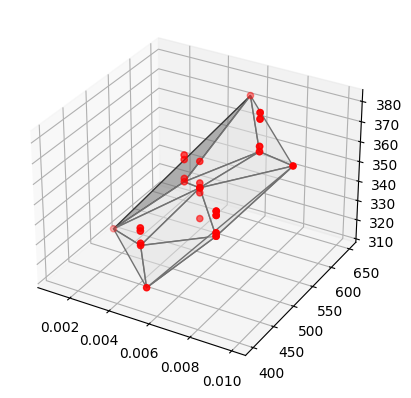

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

X, Y, Z = doe_converged['Thickness'], doe_converged['T0in'], doe_converged['Twall']

# Plot X,Y,Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(X, Y, Z, c='red')
plt.show()


In [45]:
from explann.models import FactorialModel

fm = FactorialModel(
    data = doe_converged,
    functions = {
        'Twall' : 'Twall ~ Thickness * CP3_y * T0in * p0in * outerTemperature'
    }
)

fm.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.996
 Model:                            OLS   Adj. R-squared:                  0.990
 Method:                 Least Squares   F-statistic:                     168.2
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.78e-15
 Time:                        20:51:35   Log-Likelihood:                -62.715
 No. Observations:                  43   AIC:                             179.4
 Df Residuals:                      16   BIC:                             227.0
 Df Model:                          26                                         
 Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [46]:
fm.get_significant_model_functions()

{'Twall': 'Twall ~ '}

In [43]:
fm.get_significant_model_functions()

sig_fm = fm.build_significant_models()

PatsyError: expected a noun, but instead the expression ended
    Twall ~
          ^

In [40]:
sig_fm.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.969
 Model:                            OLS   Adj. R-squared:                  0.967
 Method:                 Least Squares   F-statistic:                     397.9
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           9.58e-91
 Time:                        20:50:52   Log-Likelihood:                -465.16
 No. Observations:                 138   AIC:                             952.3
 Df Residuals:                     127   BIC:                             984.5
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [ ]:
sig_fm.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.969
 Model:                            OLS   Adj. R-squared:                  0.967
 Method:                 Least Squares   F-statistic:                     397.9
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           9.58e-91
 Time:                        20:45:56   Log-Likelihood:                -465.16
 No. Observations:                 138   AIC:                             952.3
 Df Residuals:                     127   BIC:                             984.5
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [ ]:
sig_fm2 = sig_fm.build_significant_models()
sig_fm2.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.946
 Model:                            OLS   Adj. R-squared:                  0.944
 Method:                 Least Squares   F-statistic:                     463.4
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           7.38e-82
 Time:                        20:46:00   Log-Likelihood:                -503.49
 No. Observations:                 138   AIC:                             1019.
 Df Residuals:                     132   BIC:                             1037.
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------

In [ ]:
sig_fm3 = sig_fm2.build_significant_models()
sig_fm3.summary()

{'Twall': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Twall   R-squared:                       0.945
 Model:                            OLS   Adj. R-squared:                  0.943
 Method:                 Least Squares   F-statistic:                     569.3
 Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.36e-82
 Time:                        20:46:07   Log-Likelihood:                -505.11
 No. Observations:                 138   AIC:                             1020.
 Df Residuals:                     133   BIC:                             1035.
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------------

In [ ]:
doe_converged.min()

ID                       1.000000
Thickness                0.001015
CP3_y                   -0.012528
T0in                   402.000000
p0in                402515.172561
outerTemperature       291.000000
Twall                  307.078583
dtype: float64

In [ ]:
doe_converged.max()

ID                     150.000000
Thickness                0.009938
CP3_y                   -0.000007
T0in                   800.000000
p0in                996679.237382
outerTemperature       400.000000
Twall                  516.145325
dtype: float64

In [ ]:
doe_converged.mean()

ID                      74.500000
Thickness                0.005472
CP3_y                   -0.006043
T0in                   595.913043
p0in                711558.623974
outerTemperature       346.420290
Twall                  395.069366
dtype: float64

In [ ]:
T0in_range = np.linspace(400,800,100)
p0in_range = np.linspace(400e3,1000e3,100)
Thickness_range = np.linspace(0.005, 0.01, 100)
outerTemperature_range = np.linspace(290, 400, 100)

X,Y = np.meshgrid(T0in_range, p0in_range)

Z = sig_fm3.model['Twall'].predict(
    pd.DataFrame({
        'Thickness': 0.005472,
        'CP3_y': -0.006943,
        'T0in': X.ravel(),#595.913043,
        'p0in': Y.ravel(),#711558.623974,
        'outerTemperature': 346.420290,
        'Twall': 395.069366
    })
)
Z = Z.values.reshape(X.shape)

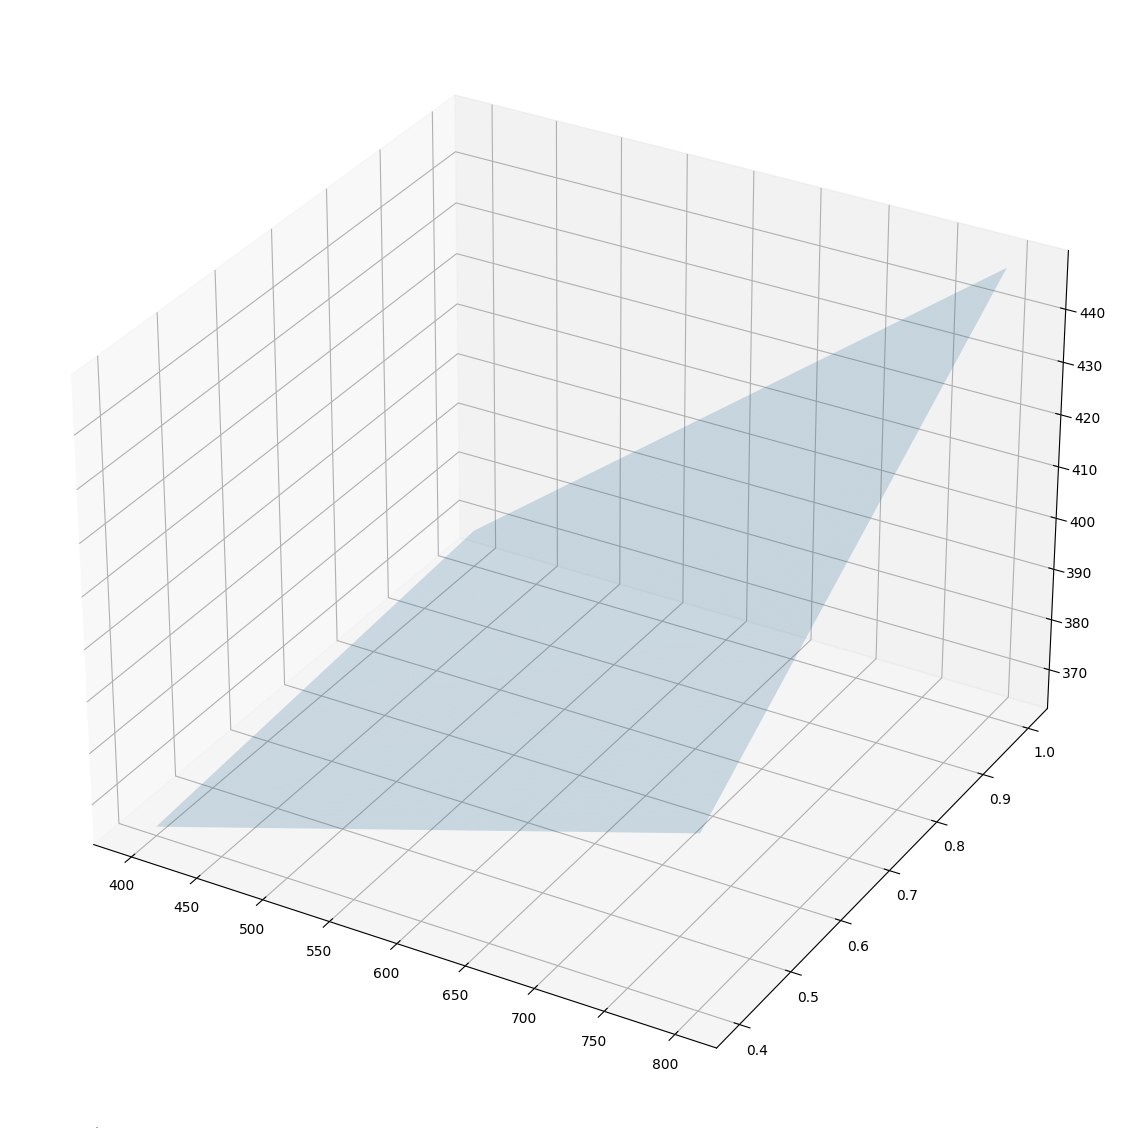

In [ ]:

fig = plt.figure(figsize=plt.figaspect(1)*3)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.2)

In [ ]:
hfdh = HDF5Handler(
    datapath='/home/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_multirun_N200/SU2_fluid_transposed.hdf5',
    datasets = ['Pressure', 'Temperature', 'Mach', 'Heat_Flux'],
)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_multirun_N200/SU2_fluid_transposed.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
hfdh.datapath

: 

In [ ]:
import h5py

h5py.File()